# Predicting the dowry to be taken (or given) based on number of factors using ML:

## Problem Definition:
> Given various credibility factors of both the parties, can we predict the dowry amount?

## Data:
We have a bog dataset of more than 15000 samples taken from various government sources, new articles and local experiences.

## Evaluate: 
If we can reach 95% accuracy in pursuing the correct amount while predcited on the cross validated test sets, we'll pursue the project.

## Features:
Based on 13 most important features, But we'll evaluate further if we could remove or add other features according to the Project's need.

### Importing the tools:

Importing the various tools for further ML project

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

### Fetching data and doing EDA

In [2]:
data = pd.read_csv("./indian_dowry_dataset.csv")

In [3]:
data.head()

,State,Caste,Religion,Groom_Age,Bride_Age,Groom_Education_Yrs,Bride_Education_Yrs,Groom_Income_Monthly,Bride_Income_Monthly,Occupation,Marriage_Type,Area,Family_Type,Dowry_Amount_INR
0,Rajasthan,SC,Muslim,29,21,16,14,139882,52104,Business,Love,Rural,Nuclear,643114
1,Kerala,OBC,Muslim,21,29,17,10,63554,65692,Govt Job,Love,Urban,Joint,496434
2,Maharashtra,ST,Christian,28,29,17,14,53286,32341,Govt Job,Arranged,Urban,Joint,591887
3,Haryana,OBC,Muslim,27,27,15,8,99610,43283,Unemployed,Arranged,Urban,Joint,865062
4,Bihar,OBC,Sikh,33,30,15,12,58618,26546,Business,Love,Urban,Nuclear,323587


In [4]:
len(data)

15000

In [5]:
data.columns

Index(['State', 'Caste', 'Religion', 'Groom_Age', 'Bride_Age',
       'Groom_Education_Yrs', 'Bride_Education_Yrs', 'Groom_Income_Monthly',
       'Bride_Income_Monthly', 'Occupation', 'Marriage_Type', 'Area',
       'Family_Type', 'Dowry_Amount_INR'],
      dtype='object')

In [6]:
# I think General categories have higher dowry amount. Let's find out

In [7]:
data.Caste.value_counts()

Caste
OBC        3825
General    3787
SC         3726
ST         3662
Name: count, dtype: int64

In [8]:
data.Dowry_Amount_INR.sum()

np.int64(9494524854)

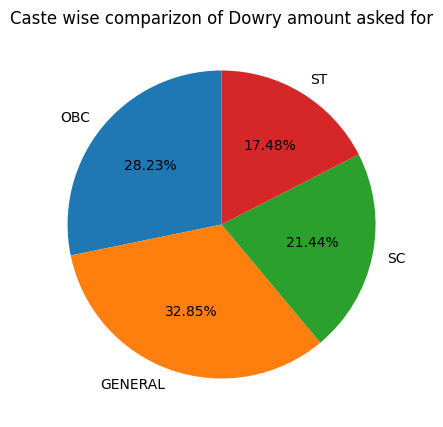

In [9]:
OBC_dowry = data.Dowry_Amount_INR[data.Caste == "OBC"].mean()
OBC_dowry

General_dowry = data.Dowry_Amount_INR[data.Caste == "General"].mean()
General_dowry

SC_dowry = data.Dowry_Amount_INR[data.Caste == "SC"].mean()
SC_dowry

ST_dowry = data.Dowry_Amount_INR[data.Caste == "ST"].mean()
ST_dowry

total_Dowry = OBC_dowry + General_dowry + SC_dowry + ST_dowry

fig, ax = plt.subplots(figsize = (5, 5))

ax.pie([OBC_dowry, General_dowry, SC_dowry, ST_dowry], labels=["OBC", "GENERAL", "SC", "ST"], autopct='%1.2f%%', startangle=90);
ax.set(title = f"Caste wise comparizon of Dowry amount asked for");

Clearly, General and OBC has the most

In [10]:
data.columns

Index(['State', 'Caste', 'Religion', 'Groom_Age', 'Bride_Age',
       'Groom_Education_Yrs', 'Bride_Education_Yrs', 'Groom_Income_Monthly',
       'Bride_Income_Monthly', 'Occupation', 'Marriage_Type', 'Area',
       'Family_Type', 'Dowry_Amount_INR'],
      dtype='object')

Now, I think Love marriage has the low Dowry Rate

In [11]:
data.Marriage_Type.value_counts()

Marriage_Type
Arranged    7563
Love        7437
Name: count, dtype: int64

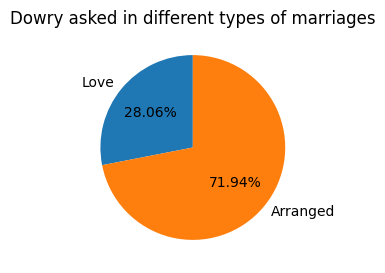

In [12]:
Love_dowry = data.Dowry_Amount_INR[data.Marriage_Type == "Love"].mean()
Arranged_dowry = data.Dowry_Amount_INR[data.Marriage_Type == "Arranged"].mean()

fig, ax = plt.subplots(figsize = (5, 3))
ax.pie([Love_dowry, Arranged_dowry], labels = ["Love", "Arranged"], startangle= 90, autopct='%1.2f%%');
ax.set(title = "Dowry asked in different types of marriages");

Let's analyse more

In [13]:
data.columns

Index(['State', 'Caste', 'Religion', 'Groom_Age', 'Bride_Age',
       'Groom_Education_Yrs', 'Bride_Education_Yrs', 'Groom_Income_Monthly',
       'Bride_Income_Monthly', 'Occupation', 'Marriage_Type', 'Area',
       'Family_Type', 'Dowry_Amount_INR'],
      dtype='object')

Does Joint families ask for more dowry

In [14]:
data.Family_Type.value_counts()

Family_Type
Nuclear    7520
Joint      7480
Name: count, dtype: int64

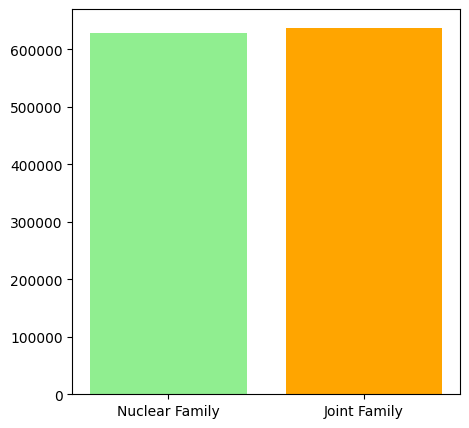

In [15]:
nuclear_dowry = data.Dowry_Amount_INR[data.Family_Type == "Nuclear"].mean()
joint_dowry = data.Dowry_Amount_INR[data.Family_Type == "Joint"].mean()

fig, ax = plt.subplots(figsize = (5, 5))
plt.bar(["Nuclear Family", "Joint Family"], [nuclear_dowry, joint_dowry], color = ["lightgreen", "orange"]);

Ohhhh... they are almost equal, when it comes to dowry, nobody is less

Let's even see the percemntage in terms of pie chart

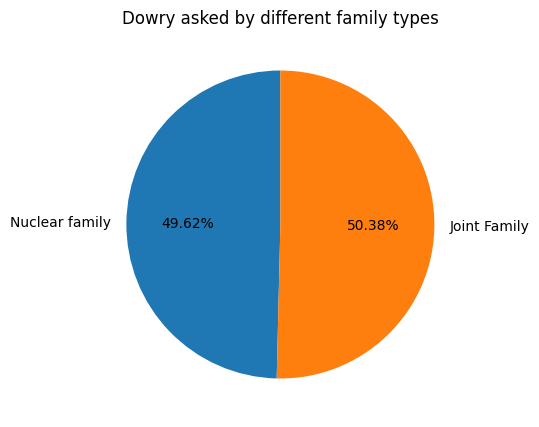

In [16]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.pie([nuclear_dowry, joint_dowry], labels=["Nuclear family", "Joint Family"], autopct='%1.2f%%', startangle=90);
ax.set(title = "Dowry asked by different family types");

Amazing. they all are same.

Let's analyse more

In [17]:
data.columns

Index(['State', 'Caste', 'Religion', 'Groom_Age', 'Bride_Age',
       'Groom_Education_Yrs', 'Bride_Education_Yrs', 'Groom_Income_Monthly',
       'Bride_Income_Monthly', 'Occupation', 'Marriage_Type', 'Area',
       'Family_Type', 'Dowry_Amount_INR'],
      dtype='object')

We have done a lot! At last just see, which Occupation asks for more

In [18]:
data.Occupation.value_counts()

Occupation
Private Job    3062
Farmer         3020
Business       3005
Govt Job       2991
Unemployed     2922
Name: count, dtype: int64

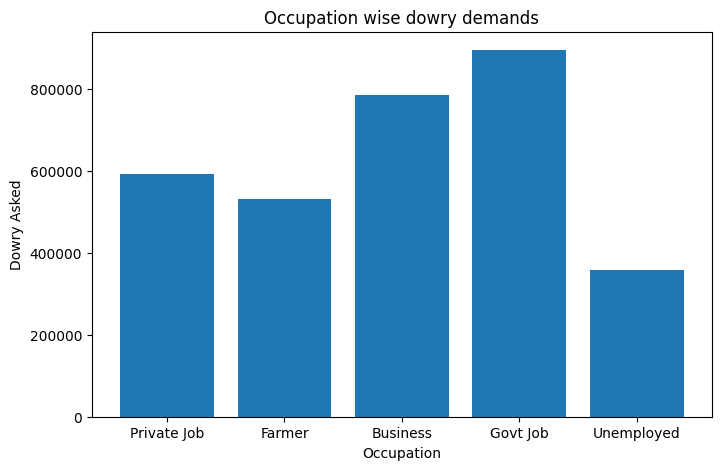

In [19]:
dowry_Occupation = {"Private Job" : data.Dowry_Amount_INR[data.Occupation == "Private Job"].mean(),
                    "Farmer" : data.Dowry_Amount_INR[data.Occupation == "Farmer"].mean(),
                    "Business" : data.Dowry_Amount_INR[data.Occupation == "Business"].mean(), 
                    "Govt Job" : data.Dowry_Amount_INR[data.Occupation == "Govt Job"].mean(),
                    "Unemployed" : data.Dowry_Amount_INR[data.Occupation == "Unemployed"].mean()}

fig, ax = plt.subplots(figsize = (8, 5))
ax.bar(dowry_Occupation.keys(), dowry_Occupation.values());
ax.set(xlabel = "Occupation", ylabel = "Dowry Asked", title = "Occupation wise dowry demands");

Great! Even unemployed asks for dowry and farmers are no less.

### Modelling

We are going to test various models and even further hypertune them side by side to achieve our said accuracy. Following are the models to be used:

1. RandomForestRegressor
2. Lasso
3. SVR
4. KNeighborsRegressor
5. DecisionTreeRegressor

In [20]:
# Preparing the data
data = data.sample(frac = 1)

X = data.drop("Dowry_Amount_INR", axis = 1)
y = data["Dowry_Amount_INR"]

data.isna().sum() # No imputed values
data.dtypes

State                   object
Caste                   object
Religion                object
Groom_Age                int64
Bride_Age                int64
Groom_Education_Yrs      int64
Bride_Education_Yrs      int64
Groom_Income_Monthly     int64
Bride_Income_Monthly     int64
Occupation              object
Marriage_Type           object
Area                    object
Family_Type             object
Dowry_Amount_INR         int64
dtype: object

In [24]:
data.head()

,State,Caste,Religion,Groom_Age,Bride_Age,Groom_Education_Yrs,Bride_Education_Yrs,Groom_Income_Monthly,Bride_Income_Monthly,Occupation,Marriage_Type,Area,Family_Type,Dowry_Amount_INR
13992,Haryana,SC,Muslim,27,21,12,15,47732,14915,Govt Job,Arranged,Rural,Nuclear,760065
10186,Maharashtra,SC,Muslim,33,27,16,15,96330,64343,Unemployed,Arranged,Urban,Nuclear,427428
4028,Maharashtra,OBC,Christian,30,24,15,17,60041,27147,Farmer,Love,Urban,Joint,317689
6827,Haryana,ST,Christian,30,24,13,17,138090,52349,Business,Love,Rural,Joint,602562
3333,Karnataka,ST,Hindu,23,21,16,11,45887,8691,Private Job,Love,Rural,Joint,157187


In [21]:
# Many cols are not numeric, lets encode them too.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

non_numerical_data = ["State", "Caste", "Religion", "Occupation", "Marriage_Type", "Area", "Family_Type"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one hot", one_hot, non_numerical_data)], remainder = "passthrough")

transformedX = transformer.fit_transform(X)
transformedX

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.50000e+01,
        4.77320e+04, 1.49150e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.50000e+01,
        9.63300e+04, 6.43430e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.70000e+01,
        6.00410e+04, 2.71470e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.70000e+01,
        7.62370e+04, 6.42600e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.90000e+01,
        1.88240e+04, 5.30530e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.60000e+01,
        1.28386e+05, 7.05270e+04]])

Let's start training our various models on the dataset

In [26]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformedX, y, test_size=0.3, shuffle = True)

In [27]:
models = {"Random Forest" : RandomForestRegressor(),
          "Lasso" : Lasso(), 
          "svm" : svm.SVR(),
          "KNN" : KNeighborsRegressor(),
          "Decision Trees" : DecisionTreeRegressor()}
def fit_and_score_models(models, X_test, X_train, y_test, y_train):
    """
    Takes model, X_test, X_train, y_test, y_train to fit on the model and then predict the score of the model each passed.
    returns the score of each model in a dict.
    """
    np.random.seed(42)
    # Making the dict to store scpres of each of the model
    model_score = {}
    # Loop through each of the model to follow the same steps
    for name, model in models.items():
        # Fitting the data
        model.fit(X_train, y_train)
        # Score of each model stored in model_score dict
        model_score[name] = round(model.score(X_test, y_test) * 100, 2)

    return model_score

In [28]:
model_scores = fit_and_score_models(models, X_test, X_train, y_test, y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.249e+13, tolerance: 3.029e+11
  model = cd_fast.enet_coordinate_descent(


In [29]:
model_scores

{'Random Forest': 98.15,
 'Lasso': 81.63,
 'svm': -9.11,
 'KNN': 23.43,
 'Decision Trees': 96.72}

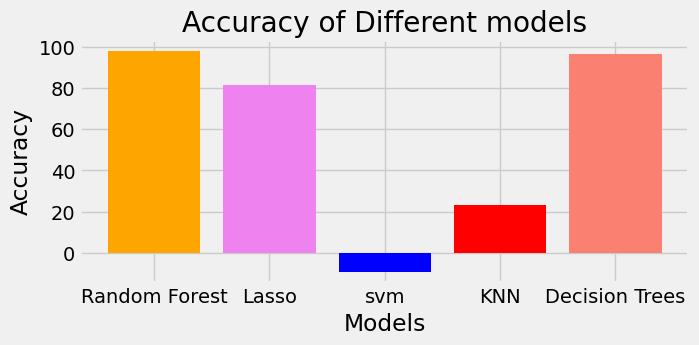

In [33]:
fig, ax = plt.subplots(figsize = (7, 3))
plt.style.use("fivethirtyeight")
colors = ["orange", "violet", "blue", "red", "salmon"]
ax.bar(model_scores.keys(), model_scores.values(), color = colors)
ax.set(xlabel = "Models", ylabel = "Accuracy", title = "Accuracy of Different models");

Random Forest is doing great! Let's evaluate it on more metrics

**Evaluation of RandomForest**

In [35]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_test)

In [36]:
RF_model.score(X_test, y_test)

0.9817287542149435

In [37]:
mae_score = mean_absolute_error(y_test, RF_y_pred)
mae_score

55529.45458666667

In [38]:
mse_score = mean_squared_error(y_test, RF_y_pred)
mse_score

5212866073.070152

In [39]:
rmse_score = root_mean_squared_error(y_test, RF_y_pred)
rmse_score

72200.18056120187

In [44]:
R2_score = r2_score(y_test, RF_y_pred)
R2_score

0.9817287542149435

In [45]:
### Ohh, Great Model!

### SAVING THE model and encoder

In [47]:
from joblib import dump, load

In [49]:
dump(RF_model, filename = ("RandomForestModel_Dowry_project.joblib"))
dump(transformer, filename=("Encoder_Dowry_project.joblib"))

['Encoder_Dowry_project.joblib']

### The goal of the project is fulfilled with the following and the project is concluded:

1. The data is cleaned and all the imputed values are filled.
2. The non numeric features of the data are also encoded well to further train ML model.
3. The model gave more than 98% accuracy while asked for 95%.
4. Did deep exploratory data analysis and concluded and found many important results and patterns which further fueled the ML.
5. Visualized all the important conclusions.
6. Used various models like RandomForest, Lasso, SVR, KNN and Decision Trees.
7. Also demonstrated their scores well with bar graphs.
8. The best model is well tuned and saved along with the encoder transformer.